## Step 1: Installations

In [1]:
!pip install /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
!pip install /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl
!pip install --no-index -U --find-links=/kaggle/input/tensorflow-2-15/tensorflow tensorflow==2.15.0
!pip install --no-index -U --find-links=/kaggle/input/deeptables-v0-2-5/deeptables-0.2.5 deeptables==0.2.5

Processing /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
autograd is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=f314011f2b8e0eca0ec4afd76b738d95acf67b12f6ea0ea76bc5c0c71225fcb9
  Stored in directory: /root/.cache/pip/wheels/6b/b5/e0/4c79e15c0b5f2c15ecf613c720bb20daab20a666eb67135155
Successfully built autograd-gamma
Processing /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl
Looking in links: /kaggle/input/tensorflow-2-15/tensorflow
Processing /kaggle/input/tensorflow-2-15/tensorflow/tensor

In [2]:
# !pip install deeptables

## Step 2: Imports

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import rankdata 
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import tensorflow as tf
import tensorflow
import tensorflow.keras.layers as layers


import numpy as np
import deeptables as dt
from deeptables.models import deeptable, deepnets
from deeptables.datasets import dsutils
from sklearn.model_selection import train_test_split


print('Tensorflow version:',tf.__version__)
print('DeepTables version:',dt.__version__)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

Tensorflow version: 2.15.0
DeepTables version: 0.2.5


## Step 2: Read the data

In [4]:
test_df = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/test.csv")
print("Test shape:", test_df.shape )

train_df = pd.read_excel("/kaggle/input/cibmtr-2024-dataset/random_folding.xlsx")
print("Train shape:",train_df.shape)
train_df.head()

Test shape: (3, 58)
Train shape: (28800, 61)


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time,fold
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0,42.356,3
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1,4.672,7
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0,19.793,6
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0,102.349,1
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0,16.223,4


## Step 4: Traget preparation

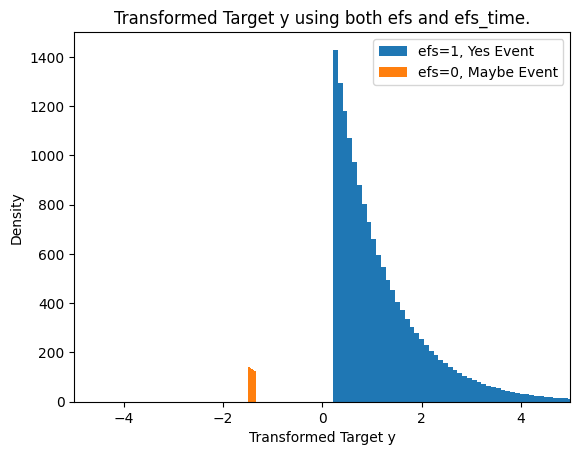

In [5]:
train_df["y"] = train_df.efs_time.values
mx = train_df.loc[train_df.efs==1,"efs_time"].max()
mn = train_df.loc[train_df.efs==0,"efs_time"].min()
train_df.loc[train_df.efs==0,"y"] = train_df.loc[train_df.efs==0,"y"] + mx - mn
train_df.y = train_df.y.rank()
train_df.loc[train_df.efs==0,"y"] += 2*len(train_df)
train_df.y = train_df.y / train_df.y.max()
train_df.y = np.log( train_df.y )
train_df.y -= train_df.y.mean()
train_df.y *= -1.0

plt.hist(train_df.loc[train_df.efs==1,"y"],bins=100,label="efs=1, Yes Event")
plt.hist(train_df.loc[train_df.efs==0,"y"],bins=100,label="efs=0, Maybe Event")
plt.xlim((-5,5))
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

In [6]:
# from lifelines import NelsonAalenFitter

# FOLDS = 10
# oof_preds = np.zeros(len(train))
# for fold in range(FOLDS):
#     train_data = train[train["fold"]!=fold].copy()
#     valid_data = train[train["fold"]==fold].copy()
    
#     naf = NelsonAalenFitter()
#     naf.fit(durations=train_data['efs_time'], event_observed=train_data['efs'])
    
#     oof_preds[valid_data.index] = -naf.cumulative_hazard_at_times(valid_data['efs_time']).values

# train['target3'] = oof_preds  

## Step 5: Features preparation

In [7]:
RMV = ["ID","efs","efs_time","y","fold"]
FEATURES = [c for c in train_df.columns if not c in RMV]
print(f"There are {len(FEATURES)} FEATURES: {FEATURES}")

There are 57 FEATURES: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


In [8]:
CATS = []
for c in FEATURES:
    if train_df[c].dtype=="object":
        CATS.append(c)
        train_df[c] = train_df[c].fillna("NAN")
        test_df[c]  = test_df[c].fillna("NAN")
    else:
        train_df[c] = train_df[c].fillna(-1)
        test_df[c]  = test_df[c].fillna(-1)
print(f"In these features, there are {len(CATS)} CATEGORICAL FEATURES: {CATS}")

In these features, there are 35 CATEGORICAL FEATURES: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'tbi_status', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


In [9]:
combined = pd.concat([train_df,test_df],axis=0,ignore_index=True)
#print("Combined data shape:", combined.shape )

# LABEL ENCODE CATEGORICAL FEATURES
print("We LABEL ENCODE the CATEGORICAL FEATURES: ",end="")
for c in FEATURES:

    # LABEL ENCODE CATEGORICAL AND CONVERT TO INT32 CATEGORY
    if c in CATS:
        print(f"{c}, ",end="")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        combined[c] = combined[c].astype("int32")
        combined[c] = combined[c].astype("category")

    # REDUCE PRECISION OF NUMERICAL TO 32BIT TO SAVE MEMORY
    else:
        if combined[c].dtype=="float64":
            combined[c] = combined[c].astype("float32")
        if combined[c].dtype=="int64":
            combined[c] = combined[c].astype("int32")
    
train_df = combined.iloc[:len(train_df)].copy()
test_df = combined.iloc[len(train_df):].reset_index(drop=True).copy()

We LABEL ENCODE the CATEGORICAL FEATURES: dri_score, psych_disturb, cyto_score, diabetes, tbi_status, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, tce_imm_match, rituximab, prod_type, cyto_score_detail, conditioning_intensity, ethnicity, obesity, mrd_hct, in_vivo_tcd, tce_match, hepatic_severe, prior_tumor, peptic_ulcer, gvhd_proph, rheum_issue, sex_match, race_group, hepatic_mild, tce_div_match, donor_related, melphalan_dose, cardiac, pulm_moderate, 

In [10]:
NUMS = [c for c in FEATURES if not c in CATS]

## Step 6: Model training

In [11]:
# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()

In [12]:
import tensorflow as tf
tf.random.set_seed(42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
%%time
FOLDS = 10
    
oof_lgb  = np.zeros(len(train_df))
pred_lgb = np.zeros(len(test_df))

models = {}

for fold in range(FOLDS):
    
    print("#"*25)
    print(f"### Fold {fold+1}")
    print("#"*25)

    x_train = train_df[train_df['fold']!=fold][FEATURES].copy()
    y_train = train_df[train_df['fold']!=fold]["y"].copy()
    x_valid = train_df[train_df['fold']==fold][FEATURES].copy()
    y_valid = train_df[train_df['fold']==fold]["y"].copy()
    x_test  = test_df[FEATURES].copy()
    
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
    config      = deeptable.ModelConfig(
                                            categorical_columns='auto',
                                            nets =['linear'], 
                                            stacking_op = 'add', 
                                            earlystopping_patience=15, 
                                            metrics=["RootMeanSquaredError"],
                                            optimizer=optimizer
                                        )

    dt             = deeptable.DeepTable(config=config)
    model, history = dt.fit(x_train, y_train, epochs=100)

    # INFER OOF
    print(f"predicting on valid data")
    model_out              = model.predict(x_valid)
    oof_lgb[x_valid.index] = model_out.flatten()
    # INFER TEST
    print(f"predicting on test data")
    pred_lgb              += (model.predict(x_test)).flatten()

    models[fold] = model

# COMPUTE AVERAGE TEST PREDS
pred_lgb /= FOLDS

#########################
### Fold 1
#########################
01-12 17:22:11 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=0.3, stacking_op='add', output_use_bias=True, apply_class_weight=False, optimizer=<keras.src.optimizers.legacy.adam.Adam object at 0x7da2b94c2e00>, loss='auto', dnn_params={'hidden_units': ((128, 0, False), (64, 0, False)), 'activation': 'relu'}, autoint

01-12 17:22:11 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:22:11 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:22:11 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:22:11 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.023367643356323242s
01-12 17:22:11 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:22:11 I deeptables.m.preprocessor.py 383 - Imputation taken 0.07860040664672852s
01-12 17:22:11 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:22:11 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.05524897575378418s
01-12 17:22:11 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.20468711853027344s
01-12 17:22:11 I deeptables.m.deeptable.py 354 - Training...
01-12 17:22:11 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:22:11 I deeptables.u.dataset_generator.py 240 - create dataset generator

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:22:12 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:23:44 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:23:44 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 2
#########################
01-12 17:23:44 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=

01-12 17:23:44 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:23:44 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:23:44 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:23:44 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.023946762084960938s
01-12 17:23:44 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:23:44 I deeptables.m.preprocessor.py 383 - Imputation taken 0.07692766189575195s
01-12 17:23:44 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:23:44 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.05671429634094238s
01-12 17:23:44 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.20613527297973633s
01-12 17:23:44 I deeptables.m.deeptable.py 354 - Training...
01-12 17:23:44 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:23:44 I deeptables.u.dataset_generator.py 240 - create dataset generator

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:23:44 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:25:13 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:25:13 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 3
#########################
01-12 17:25:13 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=

01-12 17:25:13 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:25:13 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:25:13 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:25:13 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.021411657333374023s
01-12 17:25:13 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:25:13 I deeptables.m.preprocessor.py 383 - Imputation taken 0.07651185989379883s
01-12 17:25:13 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:25:13 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.055524587631225586s
01-12 17:25:13 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.2028968334197998s
01-12 17:25:13 I deeptables.m.deeptable.py 354 - Training...
01-12 17:25:13 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:25:13 I deeptables.u.dataset_generator.py 240 - create dataset generator

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:25:13 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:26:44 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:26:44 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 4
#########################
01-12 17:26:45 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=

01-12 17:26:45 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:26:45 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:26:45 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:26:45 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.022769927978515625s
01-12 17:26:45 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:26:45 I deeptables.m.preprocessor.py 383 - Imputation taken 0.08098483085632324s
01-12 17:26:45 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:26:45 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.057097434997558594s
01-12 17:26:45 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.21411442756652832s
01-12 17:26:45 I deeptables.m.deeptable.py 354 - Training...
01-12 17:26:45 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:26:45 I deeptables.u.dataset_generator.py 240 - create dataset generato

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:26:45 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 19, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:28:17 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:28:17 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 5
#########################
01-12 17:28:17 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=

01-12 17:28:17 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:28:17 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:28:17 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:28:17 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.0218963623046875s
01-12 17:28:17 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:28:17 I deeptables.m.preprocessor.py 383 - Imputation taken 0.07726216316223145s
01-12 17:28:17 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:28:17 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.05402803421020508s
01-12 17:28:17 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.20523691177368164s
01-12 17:28:17 I deeptables.m.deeptable.py 354 - Training...
01-12 17:28:17 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:28:17 I deeptables.u.dataset_generator.py 240 - create dataset generator w

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:28:17 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:29:48 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:29:48 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 6
#########################
01-12 17:29:48 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=

01-12 17:29:48 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:29:48 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:29:48 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:29:48 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.022442340850830078s
01-12 17:29:48 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:29:48 I deeptables.m.preprocessor.py 383 - Imputation taken 0.08619332313537598s
01-12 17:29:48 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:29:48 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.05751991271972656s
01-12 17:29:48 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.2179107666015625s
01-12 17:29:48 I deeptables.m.deeptable.py 354 - Training...
01-12 17:29:48 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:29:48 I deeptables.u.dataset_generator.py 240 - create dataset generator 

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:29:48 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:31:21 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:31:21 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 7
#########################
01-12 17:31:21 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=

01-12 17:31:21 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:31:21 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:31:21 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:31:21 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.023618459701538086s
01-12 17:31:21 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:31:21 I deeptables.m.preprocessor.py 383 - Imputation taken 0.07594799995422363s
01-12 17:31:21 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:31:21 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.05402851104736328s
01-12 17:31:21 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.20444631576538086s
01-12 17:31:21 I deeptables.m.deeptable.py 354 - Training...
01-12 17:31:21 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:31:21 I deeptables.u.dataset_generator.py 240 - create dataset generator

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:31:21 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:32:50 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:32:50 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 8
#########################
01-12 17:32:50 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=

01-12 17:32:50 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:32:50 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:32:50 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:32:51 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.021335363388061523s
01-12 17:32:51 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:32:51 I deeptables.m.preprocessor.py 383 - Imputation taken 0.07800555229187012s
01-12 17:32:51 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:32:51 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.055188894271850586s
01-12 17:32:51 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.20482373237609863s
01-12 17:32:51 I deeptables.m.deeptable.py 354 - Training...
01-12 17:32:51 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:32:51 I deeptables.u.dataset_generator.py 240 - create dataset generato

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:32:51 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:34:20 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:34:20 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 9
#########################
01-12 17:34:20 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout=

01-12 17:34:20 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:34:20 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:34:20 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:34:20 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.021657943725585938s
01-12 17:34:20 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:34:20 I deeptables.m.preprocessor.py 383 - Imputation taken 0.08274245262145996s
01-12 17:34:20 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:34:20 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.05347251892089844s
01-12 17:34:20 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.2076408863067627s
01-12 17:34:20 I deeptables.m.deeptable.py 354 - Training...
01-12 17:34:20 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:34:20 I deeptables.u.dataset_generator.py 240 - create dataset generator 

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:34:21 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:35:52 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:35:52 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
#########################
### Fold 10
#########################
01-12 17:35:52 I deeptables.m.deeptable.py 338 - X.Shape=(25920, 57), y.Shape=(25920,), batch_size=128, config=ModelConfig(name='conf-1', nets=['linear'], categorical_columns='auto', exclude_columns=[], task='auto', pos_label=None, metrics=['RootMeanSquaredError'], auto_categorize=False, cat_exponent=0.5, cat_remain_numeric=True, auto_encode_label=True, auto_imputation=True, auto_discrete=False, auto_discard_unique=True, apply_gbm_features=False, gbm_params={}, gbm_feature_type='embedding', fixed_embedding_dim=True, embeddings_output_dim=4, embeddings_initializer='uniform', embeddings_regularizer=None, embeddings_activity_regularizer=None, dense_dropout=0, embedding_dropout

01-12 17:35:52 W hypernets.t.cache.py 210 - AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/cache.py", line 165, in _cache_call
    cache_key = tb.data_hasher()(key_items)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 20, in __call__
    for x in self._iter_data(data):
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 58, in _iter_data
    yield from self._iter_data(v)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 53, in _iter_data
    yield from self._iter_data(x)
  File "/usr/local/lib/python3.10/dist-packages/hypernets/tabular/data_hasher.py", line 61, in _iter_data
    pickle.dump(data, buf, protocol=pickle.HIGHEST_PROTOCOL)



01-12 17:35:52 I hypernets.t.toolbox.py 334 - Target column type is float64, so inferred as a [regression] task.
01-12 17:35:52 I deeptables.m.preprocessor.py 261 - Preparing features...
01-12 17:35:52 I deeptables.m.preprocessor.py 336 - Preparing features taken 0.0227358341217041s
01-12 17:35:52 I deeptables.m.preprocessor.py 341 - Data imputation...
01-12 17:35:52 I deeptables.m.preprocessor.py 383 - Imputation taken 0.0814199447631836s
01-12 17:35:52 I deeptables.m.preprocessor.py 388 - Categorical encoding...
01-12 17:35:52 I deeptables.m.preprocessor.py 393 - Categorical encoding taken 0.05626034736633301s
01-12 17:35:52 I deeptables.m.preprocessor.py 196 - fit_transform taken 0.2148122787475586s
01-12 17:35:52 I deeptables.m.deeptable.py 354 - Training...
01-12 17:35:52 I deeptables.m.deeptable.py 752 - Injected a callback [EarlyStopping]. monitor:val_rootmeansquarederror, patience:15, mode:min
01-12 17:35:52 I deeptables.u.dataset_generator.py 240 - create dataset generator wit

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


01-12 17:35:53 I deeptables.m.deepmodel.py 287 - >>>>>>>>>>>>>>>>>>>>>> Model Desc <<<<<<<<<<<<<<<<<<<<<<< 
---------------------------------------------------------
inputs:
---------------------------------------------------------
['all_categorical_vars: (35)', 'input_continuous_all: (22)']
---------------------------------------------------------
embeddings:
---------------------------------------------------------
input_dims: [14, 6, 10, 6, 10, 6, 4, 5, 6, 6, 20, 7, 11, 5, 4, 8, 9, 6, 6, 5, 5, 7, 6, 6, 6, 20, 6, 7, 8, 6, 7, 6, 5, 6, 6]
output_dims: [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
dropout: 0.3
---------------------------------------------------------
dense: dropout: 0
batch_normalization: False
---------------------------------------------------------
concat_embed_dense: shape: (None, 162)
---------------------------------------------------------
nets: ['linear']
------------------------------------------------

/usr/local/lib/python3.10/dist-packages/deeptables/models/deepmodel.py:188: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, h, save_format='h5')


predicting on test data
01-12 17:37:21 I deeptables.m.deepmodel.py 130 - Performing predictions...
01-12 17:37:21 I deeptables.u.dataset_generator.py 240 - create dataset generator with _TFDGForPandas, batch_size=128, shuffle=False, drop_remainder=False
CPU times: user 26min 45s, sys: 1min 28s, total: 28min 13s
Wall time: 15min 9s


## Step 7: Model score 

In [15]:
"""
To evaluate the equitable prediction of transplant survival outcomes,
we use the concordance index (C-index) between a series of event
times and a predicted score across each race group.
 
It represents the global assessment of the model discrimination power:
this is the model’s ability to correctly provide a reliable ranking
of the survival times based on the individual risk scores.
 
The concordance index is a value between 0 and 1 where:
 
0.5 is the expected result from random predictions,
1.0 is perfect concordance (with no censoring, otherwise <1.0),
0.0 is perfect anti-concordance (with no censoring, otherwise >0.0)

"""

import pandas as pd
import pandas.api.types
import numpy as np
from lifelines.utils import concordance_index

class ParticipantVisibleError(Exception):
    pass


def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str) -> float:
    """
    >>> import pandas as pd
    >>> row_id_column_name = "id"
    >>> y_pred = {'prediction': {0: 1.0, 1: 0.0, 2: 1.0}}
    >>> y_pred = pd.DataFrame(y_pred)
    >>> y_pred.insert(0, row_id_column_name, range(len(y_pred)))
    >>> y_true = { 'efs': {0: 1.0, 1: 0.0, 2: 0.0}, 'efs_time': {0: 25.1234,1: 250.1234,2: 2500.1234}, 'race_group': {0: 'race_group_1', 1: 'race_group_1', 2: 'race_group_1'}}
    >>> y_true = pd.DataFrame(y_true)
    >>> y_true.insert(0, row_id_column_name, range(len(y_true)))
    >>> score(y_true.copy(), y_pred.copy(), row_id_column_name)
    0.75
    """
    
    del solution[row_id_column_name]
    del submission[row_id_column_name]
    
    event_label = 'efs'
    interval_label = 'efs_time'
    prediction_label = 'prediction'
    for col in submission.columns:
        if not pandas.api.types.is_numeric_dtype(submission[col]):
            raise ParticipantVisibleError(f'Submission column {col} must be a number')
    # Merging solution and submission dfs on ID
    merged_df = pd.concat([solution, submission], axis=1)
    merged_df.reset_index(inplace=True)
    merged_df_race_dict = dict(merged_df.groupby(['race_group']).groups)
    metric_list = []
    for race in merged_df_race_dict.keys():
        # Retrieving values from y_test based on index
        indices = sorted(merged_df_race_dict[race])
        merged_df_race = merged_df.iloc[indices]
        # Calculate the concordance index
        c_index_race = concordance_index(
                        merged_df_race[interval_label],
                        -merged_df_race[prediction_label],
                        merged_df_race[event_label])
        metric_list.append(c_index_race)
    return float(np.mean(metric_list)-np.sqrt(np.var(metric_list)))

## Step 8: Model CV

In [16]:
y_true = train_df[["ID","efs","efs_time","race_group"]].copy()
y_pred = train_df[["ID"]].copy()
y_pred["prediction"] = oof_lgb
m = score(y_true.copy(), y_pred.copy(), "ID")
print(f"\nOverall CV for DeepTables =",m)

<ipython-input-15-a1aa375cd29b>:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df_race_dict = dict(merged_df.groupby(['race_group']).groups)



Overall CV for DeepTables = 0.6422624332777372


## Step 9: Create submission.csv

In [17]:
sub = pd.read_csv("/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv")
sub.prediction = rankdata(pred_lgb) 
sub.to_csv("submission.csv",index=False)
print("Sub shape:",sub.shape)
sub.head()

Sub shape: (3, 2)


,ID,prediction
0,28800,2.0
1,28801,3.0
2,28802,1.0


## Step 10: Save the models

In [18]:
for fold, model in models.items():
    model.model.save(f"model_fold_{fold}.keras")

In [19]:
# import pickle
# with open('tabm_exp_01.pkl', 'wb') as f:
#     pickle.dump(models, f)

In [20]:
train_df['predictions'] = oof_lgb
train_df.to_excel("dt_exp_01_oof.xlsx")